# Age-structured model shows how simple mechanisms are sufficient for generation-skipping norms.

### Caitlyn Lee
### Brendan Wallace

## Introduction

Understanding how societal norms evolve is a fundamental aspect of social science. Norms, which are beliefs or behaviors adopted by individuals and transmitted within a population, shape the fabric of society. The propagation of these norms is influenced by homophily, the tendency for individuals to associate with similar others, creating a structured social network (McPherson, Smith-Lovin, & Cook, 2001). Additionally, personality changes with age impact the adoption of new norms, with older individuals tending to be less extraverted and open to new experiences (Srivastava, John, Gosling, & Potter, 2003). Our model aims to explore the dynamics of societal norm changes within an age-structured population.

To model these dynamics, we employ a compartmental SI (Susceptible-Infectious) model. The SI model, typically used in epidemiology to describe the spread of infectious diseases, is applicable here due to its ability to represent the process of norm adoption as a form of "infection." In this context, individuals "susceptible" to a new norm can "infect" others, spreading the norm through the population through social contact. This analogy allows us to use the well-established mathematical framework of the SI model to analyze norm propagation.

### Model assumptions

Several key assumptions for our model:
 - The population is described by age: Individuals are born into the population (at age 0), live for a fixed number of years (they leave the population after 100 years), and individuals all age at a constant rate (everyone gets 1 year older per year).
 - Norms, once adopted, are adhered to indefinitely.
 - Every individual is born without the norm; everyone enters into the susceptible population.


### Formal model

The formal model is described by the following differential equations:

$$\frac{\partial S(a)}{\partial t} = - S(a) \int \beta(a, a_I) I(a_I) da_I - \frac{\partial S(a)}{\partial a}$$
$$\frac{\partial I(a)}{\partial t} =  S(a) \int \beta(a, a_I) I(a_I) da_I - \frac{\partial I(a)}{\partial a}$$

Notes

$S(a)$ represents the population adhering to the old norm at age $a$.
$I(a)$ represents the population adhering to the new norm at age $a$.
$β(a_S, a_I)$ denotes the force of norm spread between two age groups.
$t$ represents time in years, with all individuals aging by one year per time unit.

Additionally:
$$S(0) = b$$
$$I(d) = S(d) = 0$$

where $b$ is the birth rate of the population and everyone is born adhering to the old norm. All individuals die (and therefore leave either the susceptible or infected populations) at age $d$.



## Results summary

We consider four cases (comprised of three factors).

### Case 1 – Age difference leads to either a lasting norm or a passing fad.

First, we assume people are most influenced by others of their same age. We find norms either spread rapidly to the entire population, or fail to take hold outside of a specific (and aging) cohort and eventually fade.

### Case 2 – With a critical age, some trend setters are ahead of their time.

Here, we leverage the idea that people are most impressionable during their adolescence. The model shows that there’s a lag between when a norm fully takes hold in the population and when the initial trend-setters adopt the norm. 

We also find that the successful adoption of the norm into society is also very sensitive to the model parameters; if the conditions aren’t right, the new norm fails to catch on with the general public. 

### Cases 3 & 4 – Negative parental influence.

Here we consider "negative parental influence," in which an older generation's adoption of a norm makes a specific younger generation _less_ likely to adopt that same norm.

First we combine negative parental influence with age sensitivity (as in case 1). Here we find that a new norm fades from the youth, but eventually becomes entrenched among the old.

Next, we combine negative parental influence with critical age (as in case 2). We find that this leads to generation-skipping norms, which we call the "baggy pants" scenario. 




## Results Figures and Detail

### Case 1: gaussian age difference

In this case, you're most influenced by individuals around your own age.

$$\beta(aS, aI) = \beta_c e^{-((aS - aI)/\sigma)^2}$$

In [178]:
include("norms.jl");
function gaussian_age_difference(beta_c, variance)
    return (aS, aI) -> beta_c * ℯ^(-((aS - aI)/variance)^2)
end

gaussian_age_difference (generic function with 1 method)

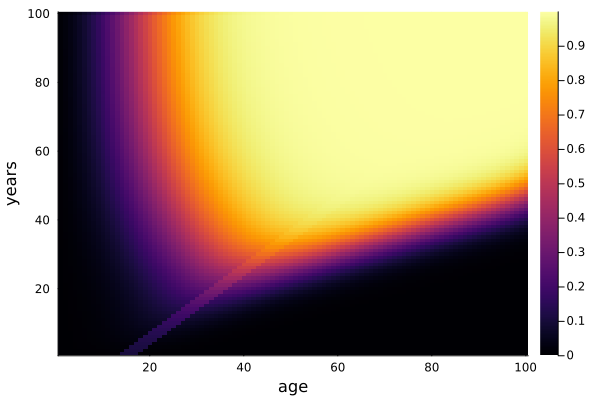

In [126]:
# takes off and remains endemic at a high prevelence
simulate(β=gaussian_age_difference(0.01, 10), years=100, dt=1, ϵ=0.1*teenagerCohort)

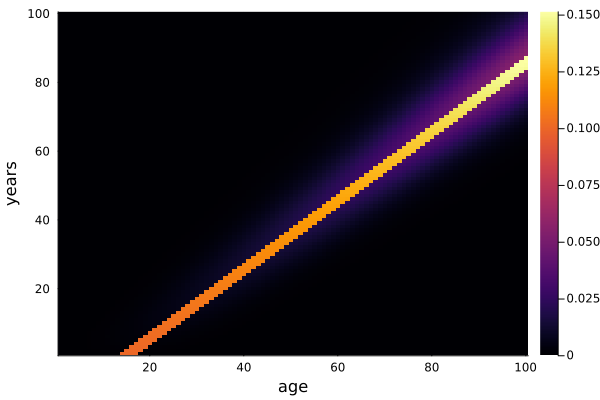

In [108]:
# fails to take off
simulate(β=gaussian_age_difference(0.001, 10), years=100, dt=1, ϵ=0.1*teenagerCohort)

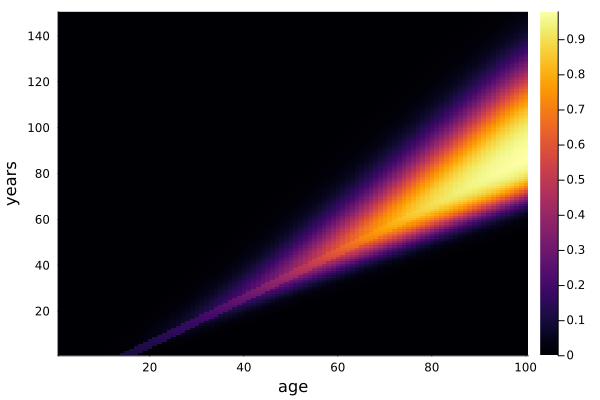

In [109]:
# starts a trend that eventually fades
simulate(β=gaussian_age_difference(0.01, 5), years=150, dt=1, ϵ=0.1*teenagerCohort)

### Case 2: susceptible teenage years

You're most influenced when you're around a critical age (we use 16).

$$\beta(a_S, a_I) = \beta_c e^{-((a_S - \text{critical\_age})/\sigma)^2} $$

In [110]:
function age_specific(beta_c, variance, critical_age)
    return (aS, aI) -> beta_c * ℯ^(-((aS - critical_age)/variance)^2)
end

age_specific (generic function with 2 methods)

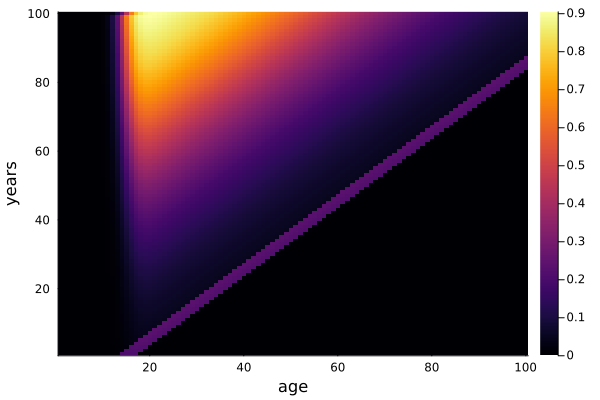

In [118]:
# Early trend-setters spark a fad (norm?) in the younger generation
fad = simulate(β=age_specific(0.01, 3, 16), years=100, dt=1, ϵ=0.2.*teenagerCohort)

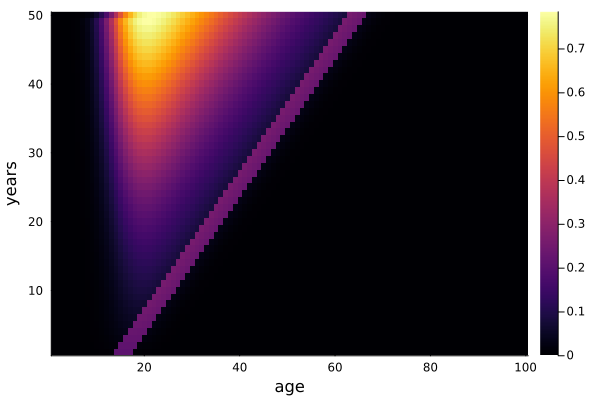

In [122]:
# same as above, zoomed in
simulate(β=age_specific(0.01, 5, 16), years=50, dt=1, ϵ=0.2.*teenagerCohort)

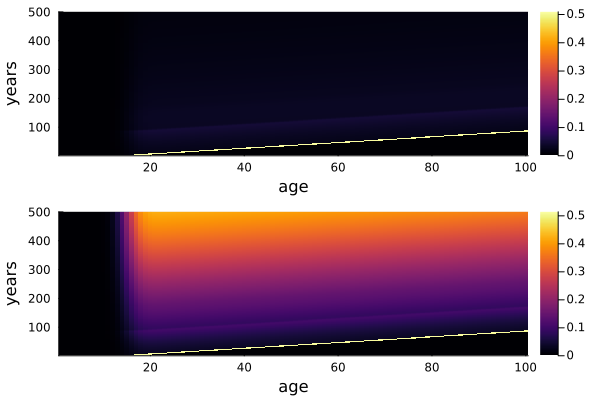

In [176]:
# Here we see a stark threshold effect. With $\beta_c = 0.002$ there's no large adoption of the new norm.
# With $\beta_c = 0.003$, the norm becomes widespread.
extinct = simulate(β=age_specific(0.002, 3, 16), years=500, dt=1, ϵ=0.5.*teenagerCohort)
endemic = simulate(β=age_specific(0.003, 3, 16), years=500, dt=1, ϵ=0.5.*teenagerCohort)
plot(extinct, endemic, layout=(2, 1))

### Case 3 – Age difference with negative parental influence

You're most influenced by your peers, but you're _negatively_ influenced by your "parent generation." (Here we use an age difference of 30 years)

$$\beta(a_S, a_I) = \beta_1 e^{-((a_S - a_I)/\sigma )^2} - \beta_2 e^{-(((a_I - a_S) - \text{agedifference})/\sigma)^2}$$

In [190]:
function negative_influence(beta1, beta2, variance, age_difference)
    return (aS, aI) -> beta1 * ℯ^((-((aS - aI)/variance)^2)) - beta2 * ℯ^(-(((aI - aS) - age_difference)/variance)^2)
end;

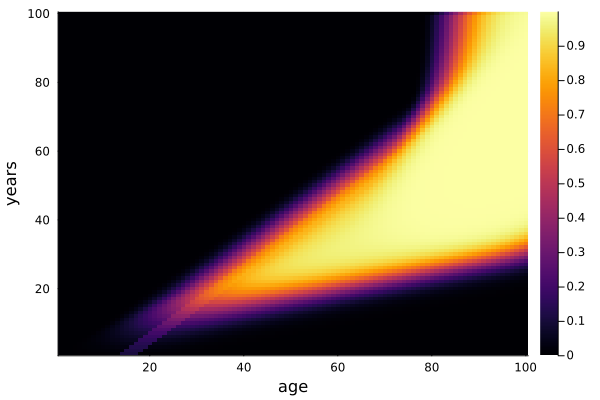

In [181]:
# Here we see an odd effect. The norm catches on within an age cohort, and then spreads to only
# an older generation. This is presumably the result of the oldest age cohort being
# immune to negative parental influence, as _their_ parental cohort ages out of the model.
#
# As far as we can tell, this effect is quite robust across a wide range of parameters.
simulate(β=negative_influence(0.02, 0.02, 10, 30), years=100, dt=1, ϵ=0.1*teenagerCohort)

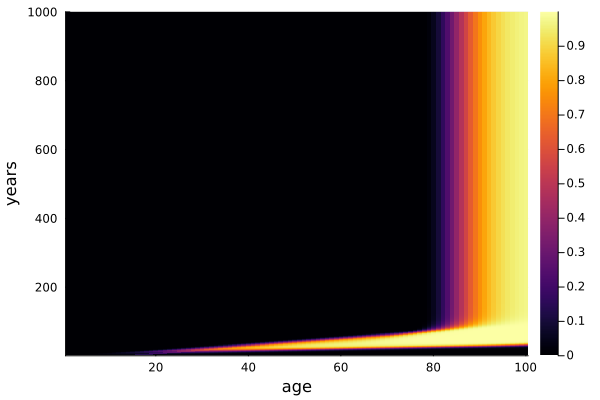

In [182]:
# Here's the same simulation, run for 1000 years to show how stable the effect is.
simulate(β=negative_influence(0.02, 0.02, 10, 30), years=1000, dt=1, ϵ=0.1*teenagerCohort)

### Case 4 – Critical age with negative parental influence

Here we combine negative parental influence with a critical susceptible age.

Finally we see the oscillating pattern we were interested in! The norm alternates generations with a period of 30 years.

$$\beta_1 * e^{(-((a_S - \text{criticalage})/\sigma)^2)} - \beta_2 e^{-(((a_I - a_S) - agedifference)/\sigma)^2}$$


In [194]:
function critical_negative_influence(beta1, beta2, variance, critical_age, age_difference)
    return (aS, aI) -> beta1 * ℯ^((-((aS - critical_age)/variance)^2)) - beta2 * ℯ^(-(((aI - aS) - age_difference)/variance)^2)
end

critical_negative_influence (generic function with 1 method)

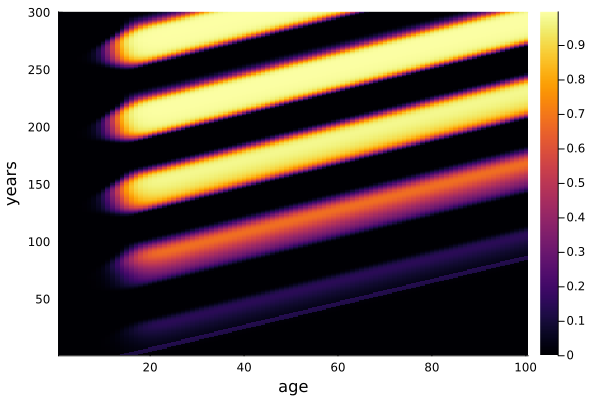

In [192]:
# Here we see that influence from the "grandparent" generation is sufficient to spark a new "norm"
# in the youngest generation. But that the norm destinctively skips a generation each time.
#
# We think this is an excellent model for the norm of wearing extremely baggy pants.
simulate(β=critical_negative_influence(0.01, 0.05, 5, 16, 30), years=300, dt=1, ϵ=0.1*teenagerCohort)


## Discussion

The three cases above begin to illustrate interesting phenomena in how a societal norm changes and becomes widely accepted in a population. Our model is able to highlight different social mechanisms (similar-age peer influence, teenage influencability, etc.) by which norm changes take hold in a population. Examples of norm (transitions) that our model is able to represent include the adoption of linguistic variants (slang) or changes in social or political beliefs such as the cultural acceptance of gay marriage.

Norms that our model isn't currently well-suited to capture are ones that have a significant cost associated with changing or require the entire population to shift at the same time. For example, switching from driving on the left-hand side of the road to the right-hand side is exceptionally costly (and realistically impossible) unless the entire population adopts the new norm at once.  